# Subplots

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

plt.subplot?

<IPython.core.display.Javascript object>


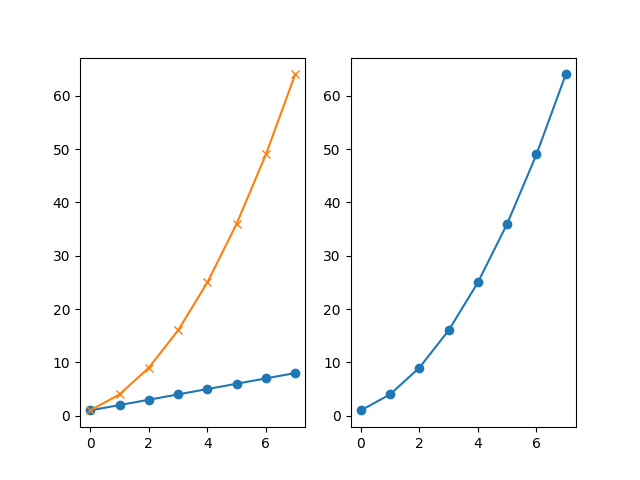

In [8]:
plt.figure()

# 1 Subplot con 1 fila, 2 columnas y el eje actual son los ejes del primer subplot
plt.subplot(1, 2, 1)

#numeros del 1 al 8 
linear_data = np.array([1,2,3,4,5,6,7,8])

#pintamos los datos
plt.plot(linear_data, '-o')

In [9]:
#creamos los datos cuadraticos
exponential_data = linear_data**2 

# Reconfiguramos el subplot con 1 fila, 2 columnas y el eje actual (en el que se trabajará) 
#es segundo eje del grafico (subplot)

plt.subplot(1, 2, 2)
#pintamos los datos cuadraticos
plt.plot(exponential_data, '-o')

In [10]:
# plot exponential data on 1st subplot axes
plt.subplot(1, 2, 1)
plt.plot(exponential_data, '-x')

<IPython.core.display.Javascript object>


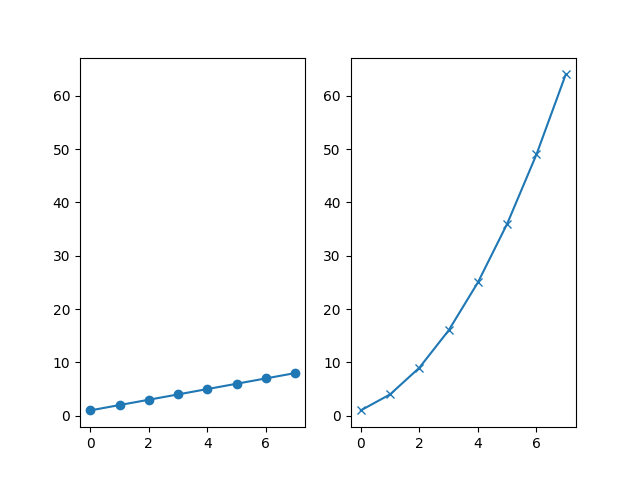

In [11]:
plt.figure()
ax1 = plt.subplot(1, 2, 1)
plt.plot(linear_data, '-o')
# pass sharey=ax1 to ensure the two subplots share the same y axis
ax2 = plt.subplot(1, 2, 2, sharey=ax1)
plt.plot(exponential_data, '-x')

<IPython.core.display.Javascript object>


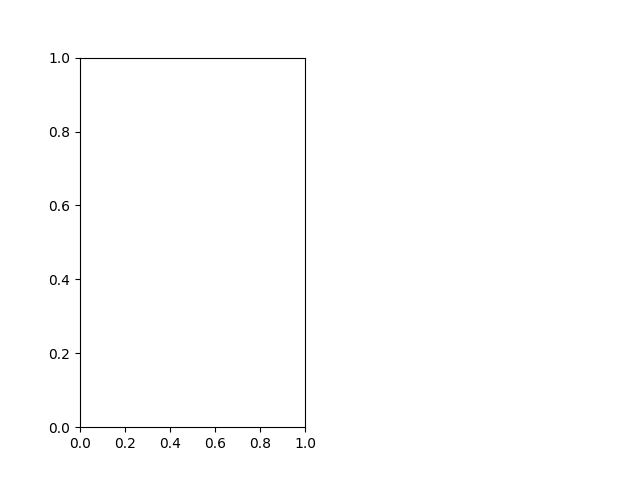

True

In [12]:
plt.figure()
# the right hand side is equivalent shorthand syntax
plt.subplot(1,2,1) == plt.subplot(121)

<IPython.core.display.Javascript object>


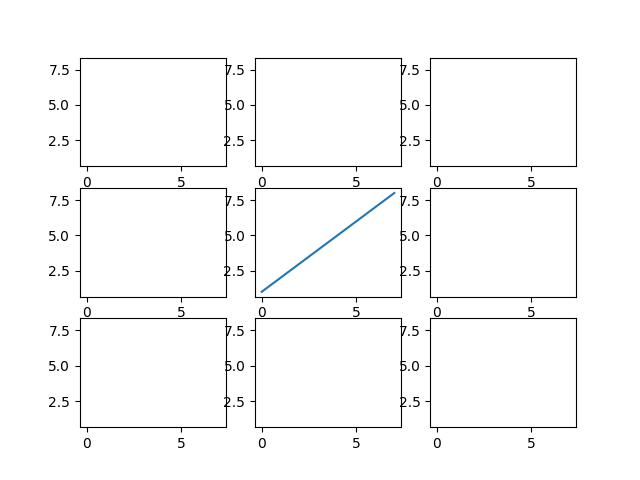

In [13]:
# create a 3x3 grid of subplots
fig, ((ax1,ax2,ax3), (ax4,ax5,ax6), (ax7,ax8,ax9)) = plt.subplots(3, 3, sharex=True, sharey=True)
# plot the linear_data on the 5th subplot axes 
ax5.plot(linear_data, '-')

In [14]:
# set inside tick labels to visible
for ax in plt.gcf().get_axes():
    for label in ax.get_xticklabels() + ax.get_yticklabels():
        label.set_visible(True)

In [15]:
# necessary on some systems to update the plot
plt.gcf().canvas.draw()

# Histograms

#### Un histograma es un gráfico de barras que muestra la frecuencia de un fenómeno dado.

#### Un gran ejemplo son las distribuciones de probabilidad. 
#### Por ejemplo, en el primer curso de esta especialización, Tocamos la diferencia entre lo aleatorio, lo uniforme, lo normal y lo Distribuciones chi cuadradas.

#### La función de probabilidad se puede visualizar como una curva, donde se mantiene en el eje y, la probabilidad de que se produzca un valor determinado y el eje x es el valor en sí mismo. Esto se llama una **función de densidad de probabilidad**. 

#### Los valores del eje y están limitados entre cero y uno, donde cero significa que no hay posibilidad de que ocurra un valor dado y uno significa que el valor siempre ocurrirá.

#### Los valores del eje x están etiquetados en términos de la función de distribución. En el caso de la distribución normal, esto es generalmente en términos de desviaciones estándar.

#### Entonces, un histograma es solo un gráfico de barras donde el eje x es una observación dada y El eje y es la frecuencia con la que se produce esa observación. Entonces deberíamos poder trazar una distribución de probabilidad dada por muestreo de ella.

#### Ahora, recuerde que el muestreo significa que simplemente seleccionamos un número de la distribución, como tirar un dado o sacar una sola carta de una baraja. Mientras hacemos esto una y otra vez, Obtenemos una descripción más precisa de la distribución.

### Vamos a sacar algunas muestras de la distribución normal y trazar cuatro histogramas diferentes como subplots. 

### Primero crearé nuestros objetos de eje de grado 2 x 2. En este caso, no queremos compartir el eje y* entre los gráficos ya que estamos mirando intencionalmente a diferentes tamaños de muestras.

<IPython.core.display.Javascript object>


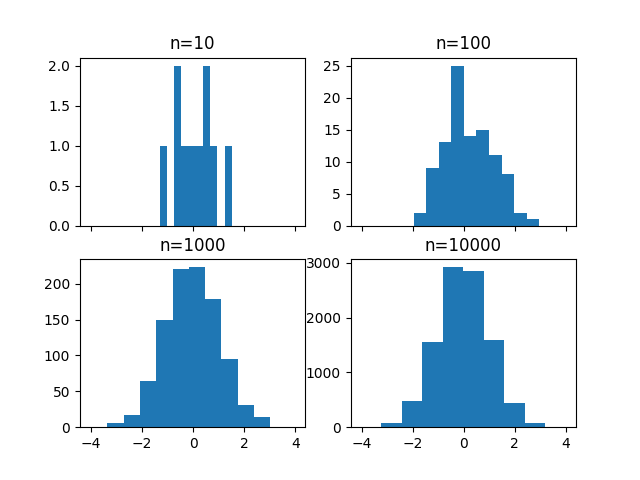

In [16]:
# creando una grilla de ejes de 2x2 subplots, campartiendo el eje x.. es decir,
# los mismos valores del eje x para todos los plots
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex=True)

#creamos una lista para contener a los 4 ejes
axs = [ax1,ax2,ax3,ax4]

# draw n = 10, 100, 1000 y 10000 muestras de la distribución normal y dibuje los histogramas correspondientes
for n in range(0,len(axs)):
    #creamos la muestra
    sample_size = 10**(n+1)
    sample = np.random.normal(loc=0.0, scale=1.0, size=sample_size)
    
    #asignamos a cada eje una muestra aleatoria
    axs[n].hist(sample)
    axs[n].set_title('n={}'.format(sample_size))

#Recuerda que la función normal de aleatorio solo crea una lista de números. Basado en la distribución normal subyacente.
#Luego podemos trazarlos en un objeto de eje dado usando la función hist. Y establece el título según corresponda.

#### La primera parcela solo tiene diez muestras, por lo que parece bastante irregular. 

#### Cuando saltamos a 100 muestras, mejora, pero todavía es bastante irregular. 
#### Luego parece suavizar un poco las parcelas para 1,000 y 10,000 muestras.

#### Pero si miramos de cerca, podemos ver que la barra de las 10,000 parcelas Son en realidad más anchas que las de las parcelas 10 o 100. ¿Que está pasando aqui?

#### Por defecto, el histograma en Matplotlib usa diez contenedores, es decir, diez barras diferentes. 
#### Aquí creamos un eje x compartido y, a medida que muestreamos más de la distribución, es más probable que obtengamos valores atípicos más lejos de nuestra media. Por lo tanto, diez bandejas para n = 10 en el mejor de los casos capturan diez valores únicos, mientras que para n = 10,000, muchos valores deben combinarse en un solo contenedor. 

#### Hagamos la misma función con el bin ajustado a 100: 

<IPython.core.display.Javascript object>


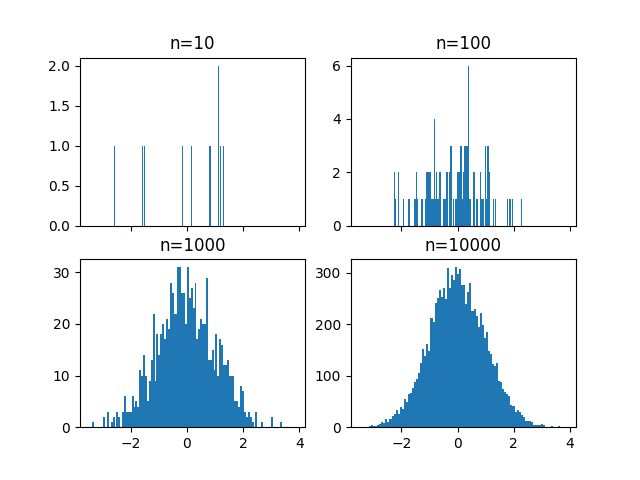

In [17]:
# repetir con el número de contenedores establecidos a 100
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex=True)
axs = [ax1,ax2,ax3,ax4]

for n in range(0,len(axs)):
    sample_size = 10**(n+1)
    sample = np.random.normal(loc=0.0, scale=1.0, size=sample_size)
    #aqui cambiamos el numero de contendores
    axs[n].hist(sample, bins=100)
    axs[n].set_title('n={}'.format(sample_size))

#### Ahora vemos que la parcela de 10.000 muestras parece mucho más suave que todas los demás. Y el gráfico de 10 muestras muestra que cada muestra está básicamente en su propia bandeja.

#### Así que creo que esto plantea una pregunta importante sobre cuántos contenedores debe trazar cuando se usa un histograma. Me temo que la respuesta no es muy clara. Ambas gráficas son verdaderas, una es una visualización de los datos en una granularidad gruesa, y uno en una granularidad de grano más fino. 

#### Cuando observamos la granularidad más fina en nuestros datos, graficamos con 10,000 contenedores entonces los histogramas se vuelven básicamente inútiles para la toma de decisiones. Ya que no muestran tendencias entre muestras tanto como simplemente muestran el tamaño de la muestra en sí.

#### Esto es similar al uso de estadísticas agregadas como la media en desviación estándar para describir una muestra de una población. Estos valores son toscos y Si son apropiados depende en gran medida de sus preguntas e intereses.


### Quiero usar nuestro nuevo conocimiento de histogramas y subplots para presentarle un diseño de GridSpec más flexible para subplots. GridSpec le permite asignar ejes sobre varias celdas en una cuadrícula:

#### Por ejemplo, vamos a crear un diagrama de dispersión de donde, los valores de Y provienen de una distribución normal y los valores de X provienen de una distribución aleatoria.

#### No queda totalmente claro al observar esta trama cuáles son las distribuciones reales son para cada eje, pero podríamos agregar dos parcelas más pequeñas, Cada histograma, para hacer esto un poco más claro.


<IPython.core.display.Javascript object>


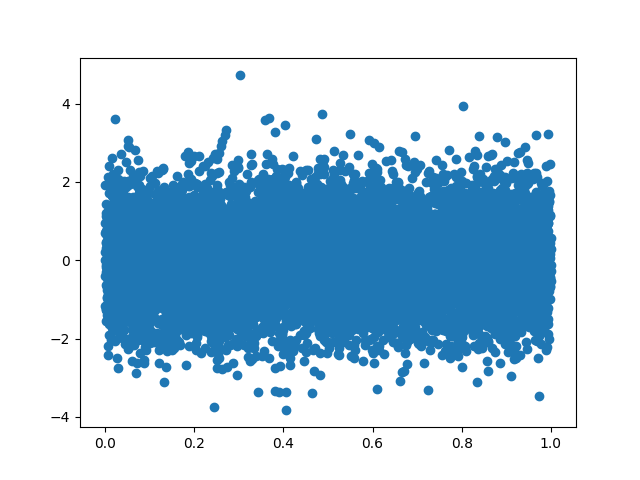

In [18]:
plt.figure()
Y = np.random.normal(loc=0.0, scale=1.0, size=10000)
X = np.random.random(size=10000)
plt.scatter(X,Y)

<IPython.core.display.Javascript object>


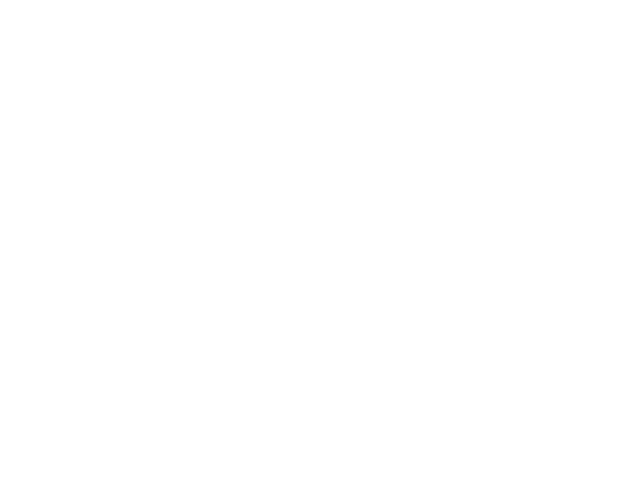

In [19]:
# Para utilizar el GridSpec, Primero lo importamos, luego creamos una nueva GridSpec, la forma general que queremos.
import matplotlib.gridspec as gridspec

plt.figure()

# Voy a definir una cuadrícula de 3x3, nueve celdas en total. 
# Quiero que el primer histograma ocupe el espacio superior derecho y el segundo histograma 
# para ocupar los dos espacios inferiores del extremo izquierdo, girados de lado.

gspec = gridspec.GridSpec(3, 3)


#### Cuando agregamos nuevos elementos con el argumento secundario, En lugar de especificar los tres números de fila, columna y posición, pasamos en los elementos del objeto GridSpec que queremos cubrir. Y muy importante aquí. Debido a que estamos utilizando los elementos de una lista, toda la indexación comienza en cero, y es muy razonable utilizar la segmentación para el principio o el final de las listas.

#### GridSpec se indexa como filas y columnas mediante el operador de indexación, o corchetes. Así que vamos a crear el primer argumento secundario y el histograma en la fila 0, cubriendo el primer elemento, la posición media, y yendo al final de la fila.

####

In [ ]:
top_histogram = plt.subplot(gspec[0, 1:])

# Crearemos el histograma lateral empezando en la fila 1, y continuando hasta el final de los elementos 
# de la fila, pero limitado a la columna 0.
side_histogram = plt.subplot(gspec[1:, 0])
lower_right = plt.subplot(gspec[1:, 1:])

In [ ]:
# Y queremos que el histograma lateral esté alineado, por lo que vamos a rotar el diseño estableciendo 
# la orientación. En realidad, hay algunas formas de hacerlo, pero como es tan común, 
# Matplotlib tiene un parámetro de orientación que podemos establecer en horizontal

Y = np.random.normal(loc=0.0, scale=1.0, size=10000)
X = np.random.random(size=10000)
lower_right.scatter(X, Y)
top_histogram.hist(X, bins=100)
s = side_histogram.hist(Y, bins=100, orientation='horizontal')

#### Entonces llamemos a la función de borrar en los dos histogramas. Entonces podemos llamar a la función hist con el argumento normed = True. Lo que le dice a Matplotlib que escale los datos de frecuencia en el histograma entre 0 y 1.

#### También podemos voltear los ejes del histograma del lado izquierdo. utilizando la función invert_xaxis.

#### Esto nos da una solución aproximada. Podemos ver que los valores de los ejes no están alineados. Desafortunadamente, Matplotlib requiere que compartas ejes al crear gráficos, y No podemos hacer ese intercambio post hoc.


In [ ]:
# clear the histograms and plot normed histograms
top_histogram.clear()
top_histogram.hist(X, bins=100, normed=True)
side_histogram.clear()
side_histogram.hist(Y, bins=100, orientation='horizontal', normed=True)
# flip the side histogram's x axis
#invierte los ejes
side_histogram.invert_xaxis()

In [ ]:
# change axes limits
# podemos configurar el rango del eje para aclarar un poco más las cosas.
# para reducir o ampliar el conjunto de datos...
# Y lo hacemos utilizando los ejes set_xlim y set_ylim. 

for ax in [top_histogram, lower_right]:
    ax.set_xlim(0, 1)
for ax in [side_histogram, lower_right]:
    ax.set_ylim(-5, 5)

In [ ]:
%%HTML
<img src='http://educationxpress.mit.edu/sites/default/files/journal/WP1-Fig13.jpg' />

# Heatmaps

#### Los mapas de calor son una forma de visualizar datos tridimensionales y Aprovechar la proximidad espacial de esas dimensiones.

#### El problema es que los mapas de calor son bastante poderosos cuando se tienen los datos correctos. Los datos meteorológicos son un gran ejemplo. Tienes dos dimensiones, latitud y longitud, y luego podemos superponer una tercera dimensión, por ejemplo, Cantidades de temperatura o precipitación y usar color para indicar su intensidad.

#### Aquí hay otro buen ejemplo. Esta vez de la Oficina de Seguridad de Transporte de Australia. Y, de hecho, en la página de Wikipedia de Heatmaps, muestra el camino de una aerolínea, Malaysian Airlines 370, que desapareció en 2014. En la parte superior de la trayectoria de vuelo hay un mapa de calor que muestra la probabilidad del avión si habia chocado. Esta probabilidad también se muestra como un valor continuo, con colores fríos, blues, siendo usado para bajas probabilidades y Colores cálidos o cálidos, rojos, siendo utilizados para alta probabilidad.


#### Así que los mapas de calor no son del todo malos. Pero donde se rompen es cuando no hay una relación continua entre dimensiones. Usar un mapa de calor para datos categóricos, por ejemplo, es simplemente erróneo. Engaña al espectador a buscar patrones y Ordenación por proximidad espacial. Y cualquiera de estos patrones sería puramente falso.

#### Bien, ahora que tienes la idea, hablemos de las técnicas. 
#### En matplotlib, un mapa de calor es simplemente un histograma de dos dimensiones donde x y los valores y indican puntos potenciales y El color trazado es la frecuencia de la observación.

<IPython.core.display.Javascript object>


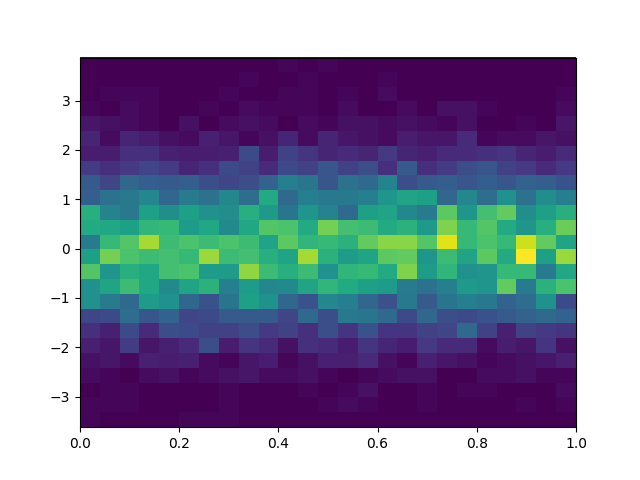

In [15]:
# Anteriormente, hablamos de diferentes distribuciones estadísticas y Funcionan bien para esta demostración.
# De hecho, vamos a rehacer nuestras subparcelas donde mostramos un diagrama de dispersión y Dos histogramas, 
# uno para cada dimensión.
plt.figure()

# En eso definimos los valores de Y que provienen de la distribución normal
# Los valores de X provendrán de una distribución aleatoria.
Y = np.random.normal(loc=0.0, scale=1.0, size=10000)
X = np.random.random(size=10000)

# Para representar esto como un histograma bidimensional, Simplemente lo pasamos a la función hist2d.
_ = plt.hist2d(X, Y, bins=25)

#### Vea cómo los colores del borde en la parte superior e inferior son de color morado muy oscuro, Mientras que hay verdes y amarillos en el horizonte medio de la imagen.

####  Ahora hablamos un poco sobre lo que sucede cuando aumentas o Disminuye el número de bins con histogramas regulares. Pero, ¿cómo crees que esto cambia cuando se usan mapas de calor?

### Usted ve, a medida que aumenta los contenedores (bins), obtiene el mismo efecto. Cada punto de datos comienza a caer en su propia categoría.

#### Así se obtiene una imagen más clara. Pero todo eventualmente es solo un color desde cada punto de datos termina siendo unico

In [ ]:
# agrega una barra de colores como leyenda
plt.colorbar()